In [1]:
import uproot
import vector
import pickle



import matplotlib.pyplot as plt
import numpy as np
plt.style.use("science.mplstyle")

In [2]:
muon_vars = ["Muon_pt", "Muon_eta", "Muon_phi", "Muon_charge", "Muon_pfRelIso03_all", "Muon_pfRelIso04_all"]
jet_vars = ["Jet_pt", "Jet_eta", "Jet_phi", "Jet_mass", "Jet_nConstituents"]

path_to_input = "/pscratch/sd/r/rmastand/dimuonAD/post_root_sim/"
code = "SM_SIM"

In [3]:
filtered_muons = {key:np.empty((1,)) for key in muon_vars}
filtered_amuons = {key:np.empty((1,)) for key in muon_vars}
filtered_jets = {key:np.empty((1,)) for key in jet_vars}


Load in the data

In [4]:
for i in range(49):
    
    print(i)
    
    with open(f"{path_to_input}/filtered_mu_{code}_{i}", "rb") as input_file:
        loc_mu_feature = pickle.load(input_file)
    for mv in muon_vars:
        filtered_muons[mv] = np.hstack((filtered_muons[mv], loc_mu_feature[mv]))
        
    with open(f"{path_to_input}/filtered_amu_{code}_{i}", "rb") as input_file:
        loc_amu_feature = pickle.load(input_file)
    for mv in muon_vars:
        filtered_amuons[mv] = np.hstack((filtered_amuons[mv], loc_amu_feature[mv]))
        
    with open(f"{path_to_input}/filtered_jet_{code}_{i}", "rb") as input_file:
        loc_jet_feature = pickle.load(input_file)
    for jv in jet_vars:
        filtered_jets[jv] = np.hstack((filtered_jets[jv], loc_jet_feature[jv]))
        
   
for mv in muon_vars:
    
    filtered_muons[mv] = filtered_muons[mv][1:]
    filtered_amuons[mv] = filtered_amuons[mv][1:]
    print(mv, filtered_muons[mv].shape)

for jv in jet_vars:
    
    filtered_jets[jv] = filtered_jets[jv][1:]    
    print(jv, filtered_jets[jv].shape)


num_events = filtered_muons["Muon_pt"].shape[0]
print(f"Num. events: {num_events}")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
Muon_pt (8800385,)
Muon_eta (8800385,)
Muon_phi (8800385,)
Muon_charge (8800385,)
Muon_pfRelIso03_all (8800385,)
Muon_pfRelIso04_all (8800385,)
Jet_pt (8800385,)
Jet_eta (8800385,)
Jet_phi (8800385,)
Jet_mass (8800385,)
Jet_nConstituents (8800385,)
Num. events: 8800385


Plot data

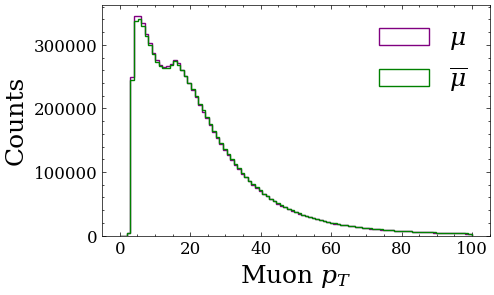

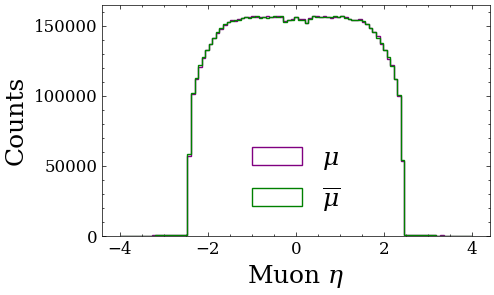

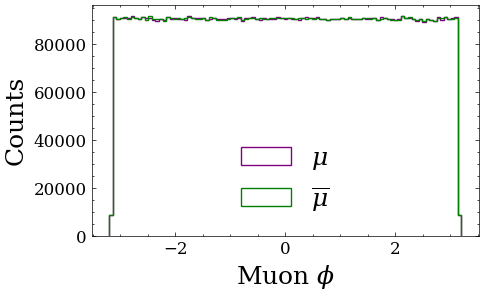

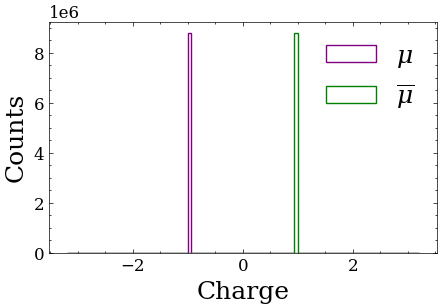

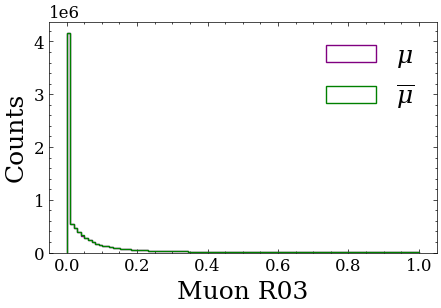

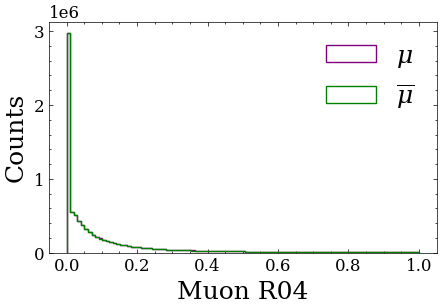

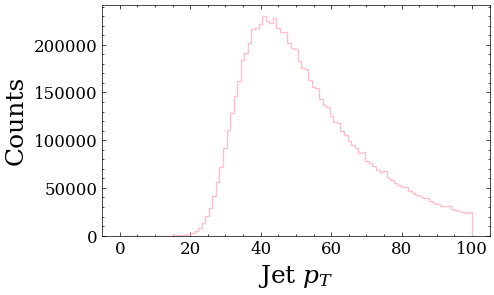

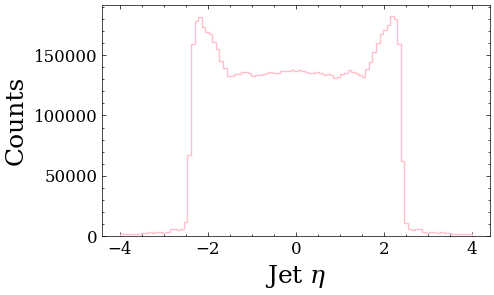

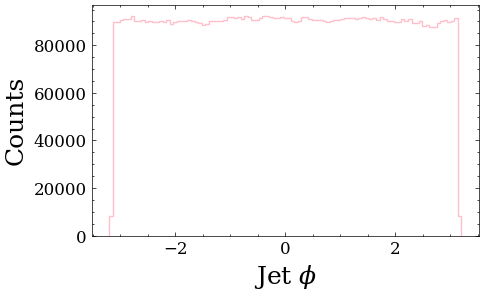

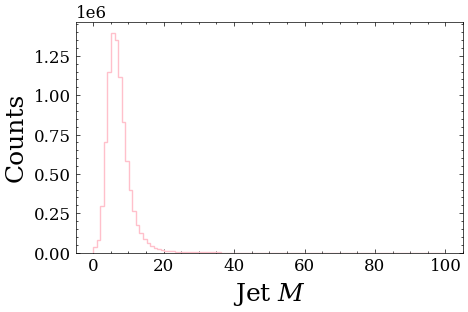

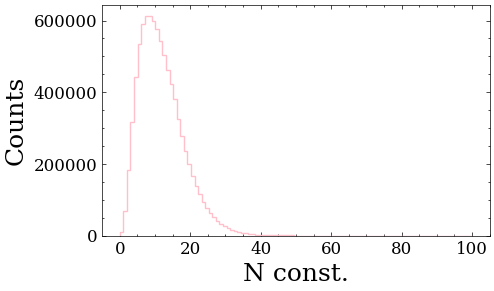

In [5]:

bins = {
    "pt":np.linspace(0, 100, 100), 
    "eta":np.linspace(-4, 4, 100),
    "phi":np.linspace(-3.2, 3.2, 100),
    "charge":np.linspace(-3.2, 3.2, 100),
    "pfRelIso03":np.linspace(0, 1, 100),
    "pfRelIso04":np.linspace(0, 1, 100),
    "mass":np.linspace(0, 100, 100),
    "nConstituents":np.linspace(0, 100, 100),
       }

nice_labels = {
    "Muon_pt":"Muon $p_T$", 
    "Muon_eta":"Muon $\eta$", 
    "Muon_phi":"Muon $\phi$", 
    "Muon_charge":"Charge",
    "Muon_pfRelIso03_all":"Muon R03",
    "Muon_pfRelIso04_all":"Muon R04",
    "Jet_pt":"Jet $p_T$", 
    "Jet_eta":"Jet $\eta$", 
    "Jet_phi":"Jet $\phi$", 
    "Jet_mass":"Jet $M$", 
    "Jet_nConstituents":"N const.",
       }
       


for mv in muon_vars:

    plt.figure()
    plt.hist(filtered_muons[mv], bins = bins[mv.split("_")[1]], histtype = "step", label = "$\mu$", color = "purple")
    plt.hist(filtered_amuons[mv], bins = bins[mv.split("_")[1]], histtype = "step", label = "$\overline{\mu}$", color = "green")
    plt.xlabel(nice_labels[mv])
    plt.ylabel("Counts")
    plt.legend()
    plt.show()
    
    
for jv in jet_vars:

    plt.figure()
    plt.hist(filtered_jets[jv], bins = bins[jv.split("_")[1]], histtype = "step", color = "pink")
    plt.xlabel(nice_labels[jv])
    plt.ylabel("Counts")
    plt.show()




Assemble dimuon system

In [6]:

muon_mass = 0.1056583755 # GeV


mu_E = np.sqrt(muon_mass**2 + (filtered_muons["Muon_pt"]*np.cosh(filtered_muons["Muon_eta"]))**2)
amu_E = np.sqrt(muon_mass**2 + (filtered_amuons["Muon_pt"]*np.cosh(filtered_amuons["Muon_eta"]))**2)

mu_px = filtered_muons["Muon_pt"]*np.cos(filtered_muons["Muon_phi"])
amu_px = filtered_amuons["Muon_pt"]*np.cos(filtered_amuons["Muon_phi"])

mu_py = filtered_muons["Muon_pt"]*np.sin(filtered_muons["Muon_phi"])
amu_py = filtered_amuons["Muon_pt"]*np.sin(filtered_amuons["Muon_phi"])

mu_pz = filtered_muons["Muon_pt"]*np.sinh(filtered_muons["Muon_eta"])
amu_pz = filtered_amuons["Muon_pt"]*np.sinh(filtered_amuons["Muon_eta"])

dimu_E = mu_E + amu_E
dimu_px = mu_px + amu_px
dimu_py = mu_py + amu_py
dimu_pz = mu_pz + amu_pz

dimu_M = np.sqrt(dimu_E**2 - dimu_px**2 - dimu_py**2 - dimu_pz**2)
dimu_pt = np.sqrt(dimu_px**2 + dimu_py**2)
dimu_eta = np.arcsinh(dimu_pz/dimu_pt)

filtered_dimuons = {"Dimu_mass":dimu_M,
                    "Dimu_pt":dimu_pt,
                    "Dimu_eta":dimu_eta,
                    
                   }





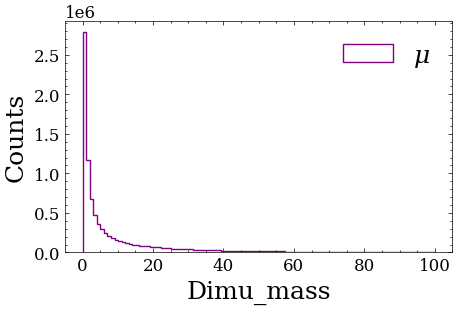

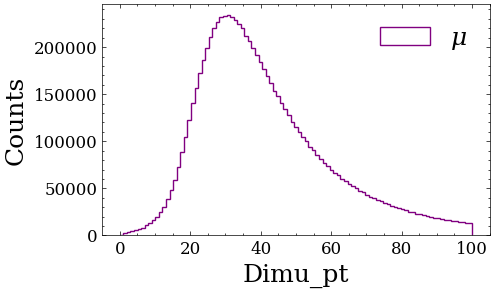

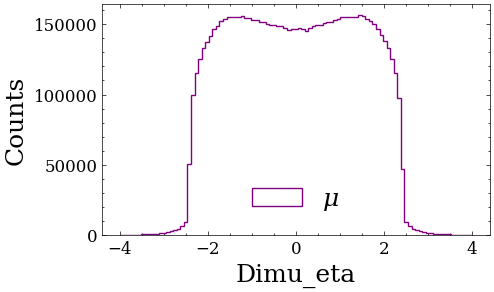

In [7]:
for key in filtered_dimuons.keys():
    

    plt.figure()
    plt.hist(filtered_dimuons[key], bins = bins[key.split("_")[1]], histtype = "step", label = "$\mu$", color = "purple")
    plt.xlabel(key)
    plt.ylabel("Counts")
    plt.legend()
    plt.show()
    

Assemble arrays

In [8]:
full_data_array = np.empty((num_events, 9))

full_data_array[:,0] = filtered_jets["Jet_pt"]
full_data_array[:,1] = filtered_jets["Jet_eta"]
full_data_array[:,2] = filtered_muons["Muon_pfRelIso03_all"]
full_data_array[:,3] = filtered_amuons["Muon_pfRelIso03_all"]
full_data_array[:,4] = filtered_muons["Muon_pfRelIso04_all"]
full_data_array[:,5] = filtered_amuons["Muon_pfRelIso04_all"]
full_data_array[:,6] = filtered_dimuons["Dimu_pt"]
full_data_array[:,7] = filtered_dimuons["Dimu_eta"]
full_data_array[:,8] = filtered_dimuons["Dimu_mass"]

print(full_data_array)


np.save(f"compiled_data/{code}", full_data_array)

[[ 2.48906250e+01 -7.86285400e-02  1.84008583e-01 ...  9.37249803e+00
   1.98658980e+00  2.57310991e+01]
 [ 5.99062500e+01 -1.68481445e+00  2.51707733e-02 ...  4.93767098e+01
  -1.67011894e+00  5.59970310e-01]
 [ 3.99687500e+01  1.27587891e+00  2.61635721e-01 ...  3.23448056e+01
  -8.38794192e-01  2.61992621e+01]
 ...
 [ 5.02500000e+01  2.31884766e+00  1.42493159e-01 ...  4.79008512e+01
  -1.17060863e+00  2.56895125e+01]
 [ 5.13125000e+01 -1.15551758e+00  1.07557900e-01 ...  4.33145401e+01
  -1.13932495e+00  7.11444726e-01]
 [ 4.62500000e+01 -1.77032471e-01  4.85031977e-02 ...  4.18867088e+01
  -1.80479977e-01  2.59003992e+00]]
